In [1]:

# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:

#importing required librariies
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',1000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the train and test dataset

df_train = pd.read_csv("/content/gdrive/MyDrive/datasets for capstone/fraudTrain.csv")
df_test = pd.read_csv("/content/gdrive/MyDrive/datasets for capstone/fraudTest.csv")
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Exploratory Data Analysis

In [4]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
# Converting date columns to datetime format

df_train['trans_date_trans_time']=pd.to_datetime(df_train['trans_date_trans_time'])
df_train['trans_date']=df_train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_train['trans_date']=pd.to_datetime(df_train['trans_date'])
df_train['dob']=pd.to_datetime(df_train['dob'])

df_test['trans_date_trans_time']=pd.to_datetime(df_test['trans_date_trans_time'])
df_test['trans_date']=df_test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_test['trans_date']=pd.to_datetime(df_test['trans_date'])
df_test['dob']=pd.to_datetime(df_test['dob'])

df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  int64         
 2   merchant               555719 non-null  object        
 3   category               555719 non-null  object        
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  object        
 8   street                 555719 non-null  object        
 9   city                   555719 non-null  object        
 10  state                  555719 non-null  object        
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [11]:
# Dropping fields not necessary for model building

drop_cols = ['cc_num','merchant','first','last','street','zip','trans_num','unix_time']

df_train1 = df_train.drop(drop_cols,axis=1)
df_test1 = df_test.drop(drop_cols,axis=1)

df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

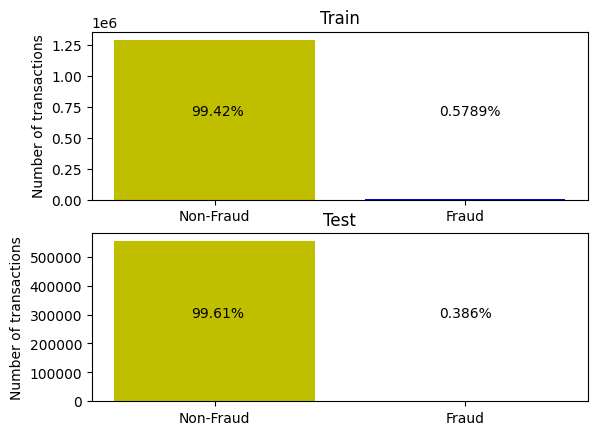

In [12]:
# Checking Class Imbalance

classes_train=df_train1['is_fraud'].value_counts()
normal_share_train=classes_train[0]/df_train1['is_fraud'].count()*100
fraud_share_train=classes_train[1]/df_train1['is_fraud'].count()*100

classes_test=df_test1['is_fraud'].value_counts()
normal_share_test=classes_test[0]/df_test1['is_fraud'].count()*100
fraud_share_test=classes_test[1]/df_test1['is_fraud'].count()*100

plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['y','b'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')

plt.subplot(2,1,2)
plt.bar(['Non-Fraud','Fraud'], classes_test, color=['y','b'])
plt.title('Test')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_test),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_test),(0.7, 0.5), xycoords='axes fraction')

plt.show()

In [13]:
# Creating field for age on transaction date

df_train1['age_at_trans'] = df_train1['trans_date'] - df_train1['dob']
df_train1['age_at_trans'] = df_train1['age_at_trans'].astype('timedelta64[Y]')

df_test1['age_at_trans'] = df_test1['trans_date'] - df_test1['dob']
df_test1['age_at_trans'] = df_test1['age_at_trans'].astype('timedelta64[Y]')

df_train1.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age_at_trans
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


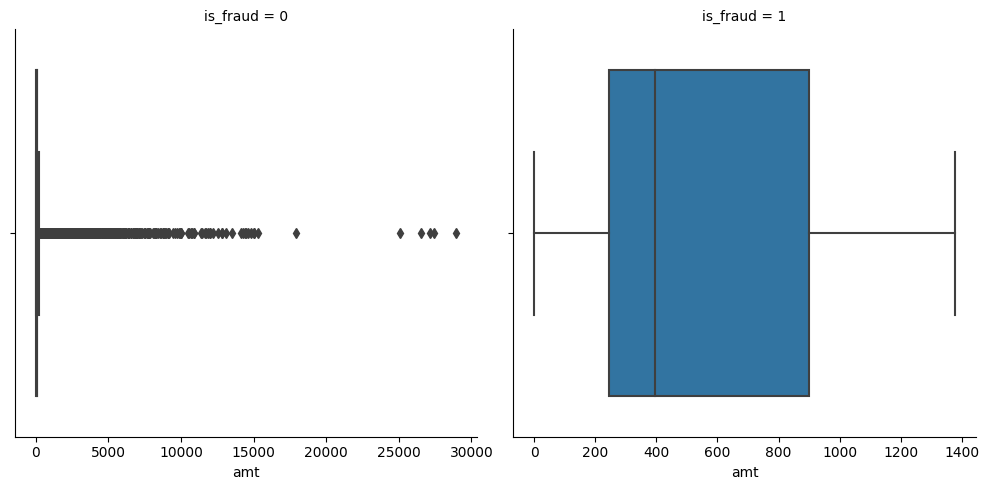

In [14]:
#Amount
sns.catplot(data=df_train1,x='amt',col='is_fraud',kind='box',sharex=False)

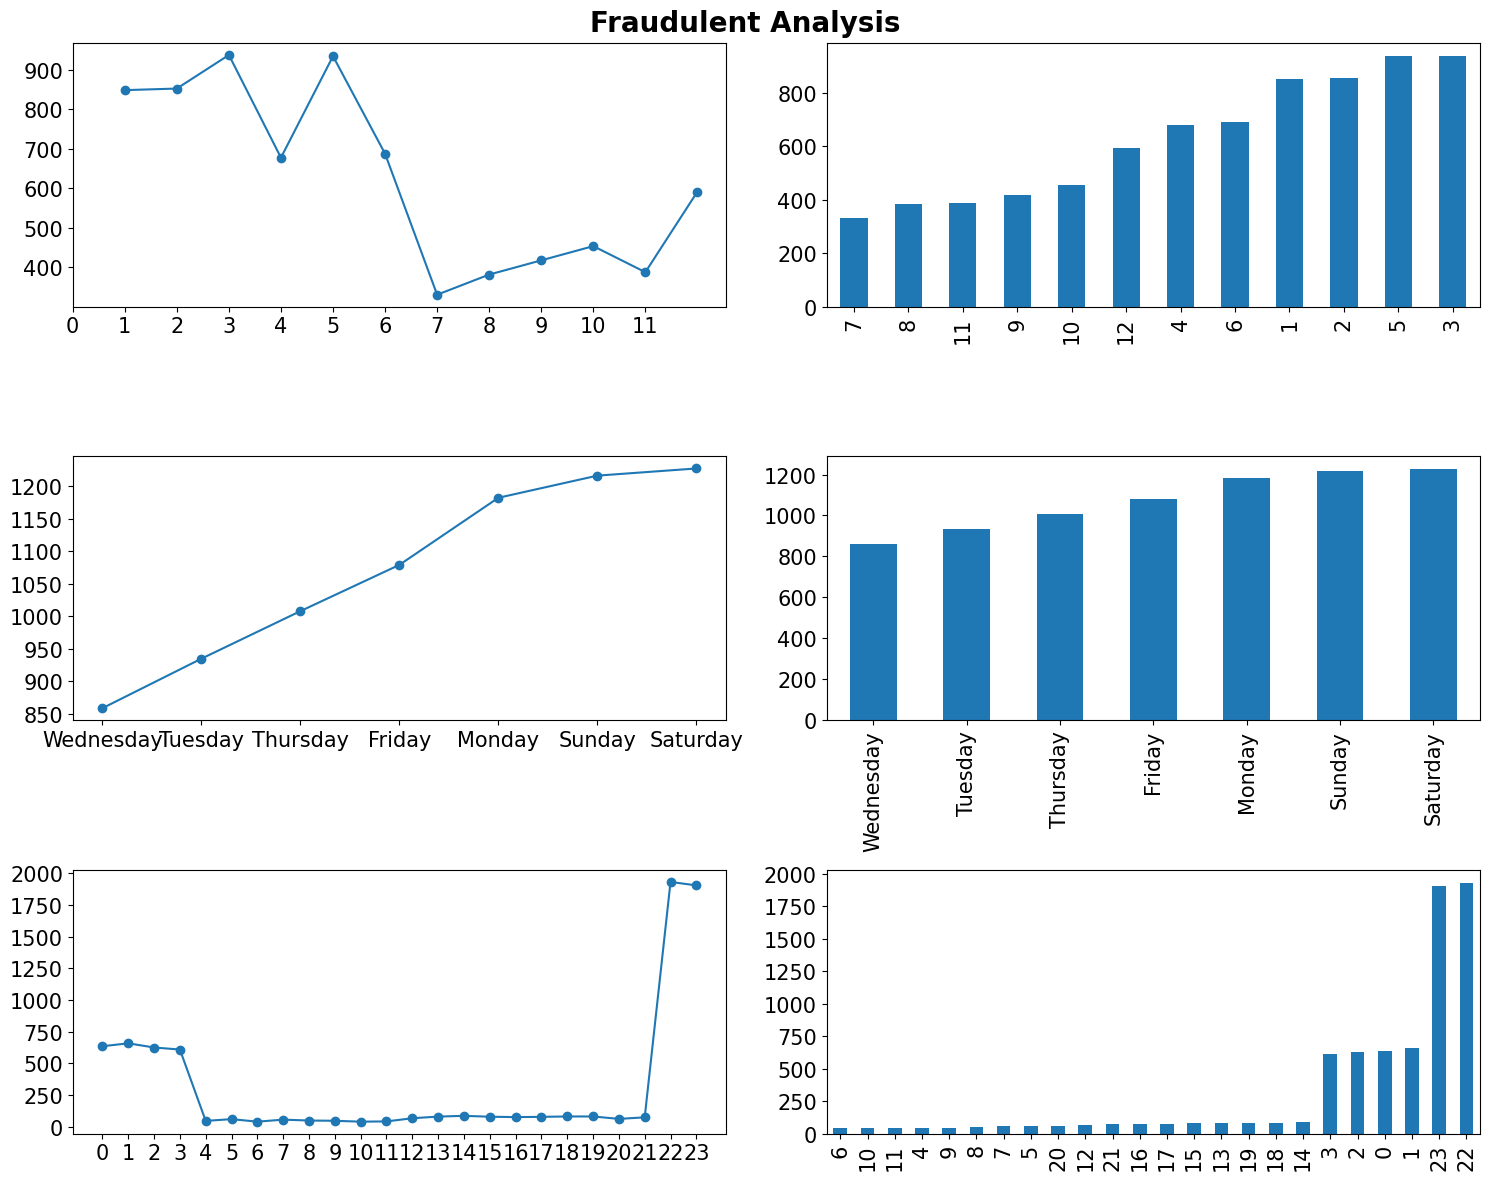

In [15]:
df_train1['month'] = df_train1['trans_date_trans_time'].dt.month
df_test1['month'] = df_test1['trans_date_trans_time'].dt.month
df_train1['day'] = df_train1['trans_date_trans_time'].dt.day_name()
df_test1['day'] = df_test1['trans_date_trans_time'].dt.day_name()
df_train1['hour'] = df_train1['trans_date_trans_time'].dt.hour
df_test1['hour'] = df_test1['trans_date_trans_time'].dt.hour
df_train1['Present_Age'] = round((df_train1['trans_date_trans_time'] - df_train1['dob'])/np.timedelta64(1, 'Y'))
df_train1['Age_category'] = pd.cut(x=df_train1['age_at_trans'], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
df_test1['Present_Age'] = round((df_test1['trans_date_trans_time'] - df_test1['dob'])/np.timedelta64(1, 'Y'))
df_test1['Age_category'] = pd.cut(x=df_test1['age_at_trans'], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
fig,axs = plt.subplots(3,2, figsize=(15, 12))
#Month
df_train1.loc[df_train1['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
df_train1.loc[df_train1['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
df_train1.loc[df_train1['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
df_train1.loc[df_train1['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour
df_train1.loc[df_train1['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
df_train1.loc[df_train1['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

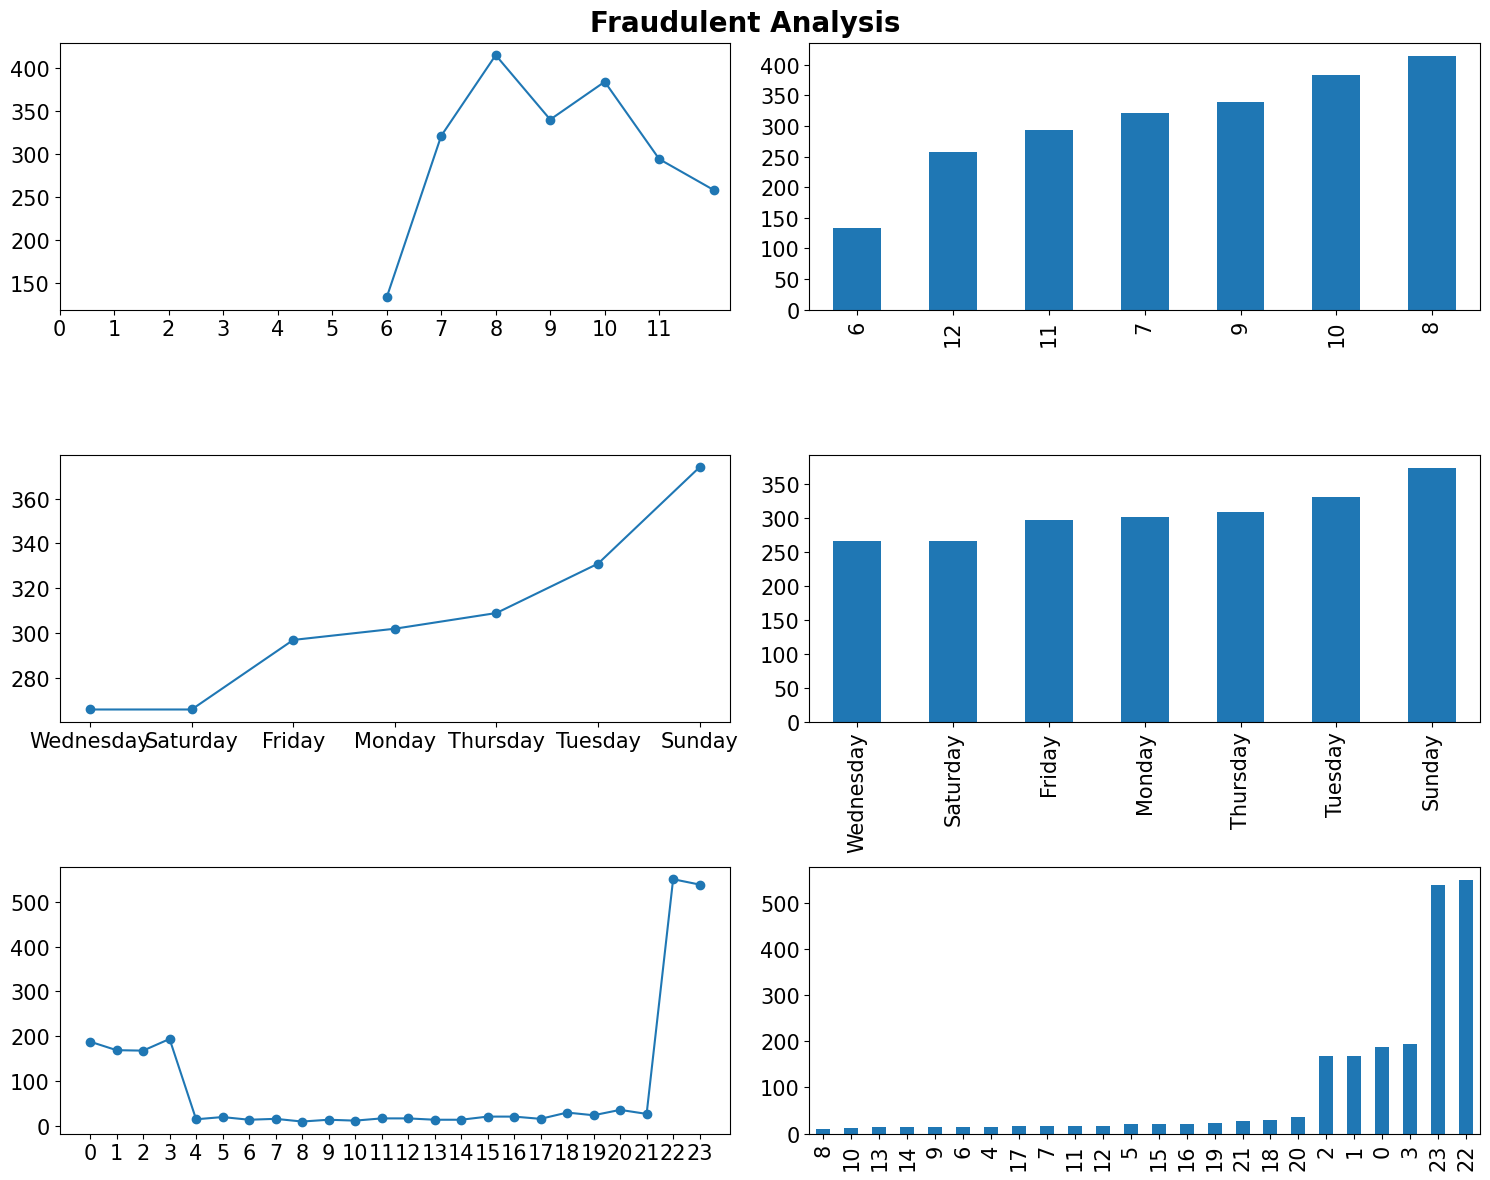

In [16]:
fig,axs = plt.subplots(3,2, figsize=(15, 12))
#Month
df_test1.loc[df_test1['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
df_test1.loc[df_test1['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
df_test1.loc[df_test1['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
df_test1.loc[df_test1['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour
df_test1.loc[df_test1['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
df_test1.loc[df_test1['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

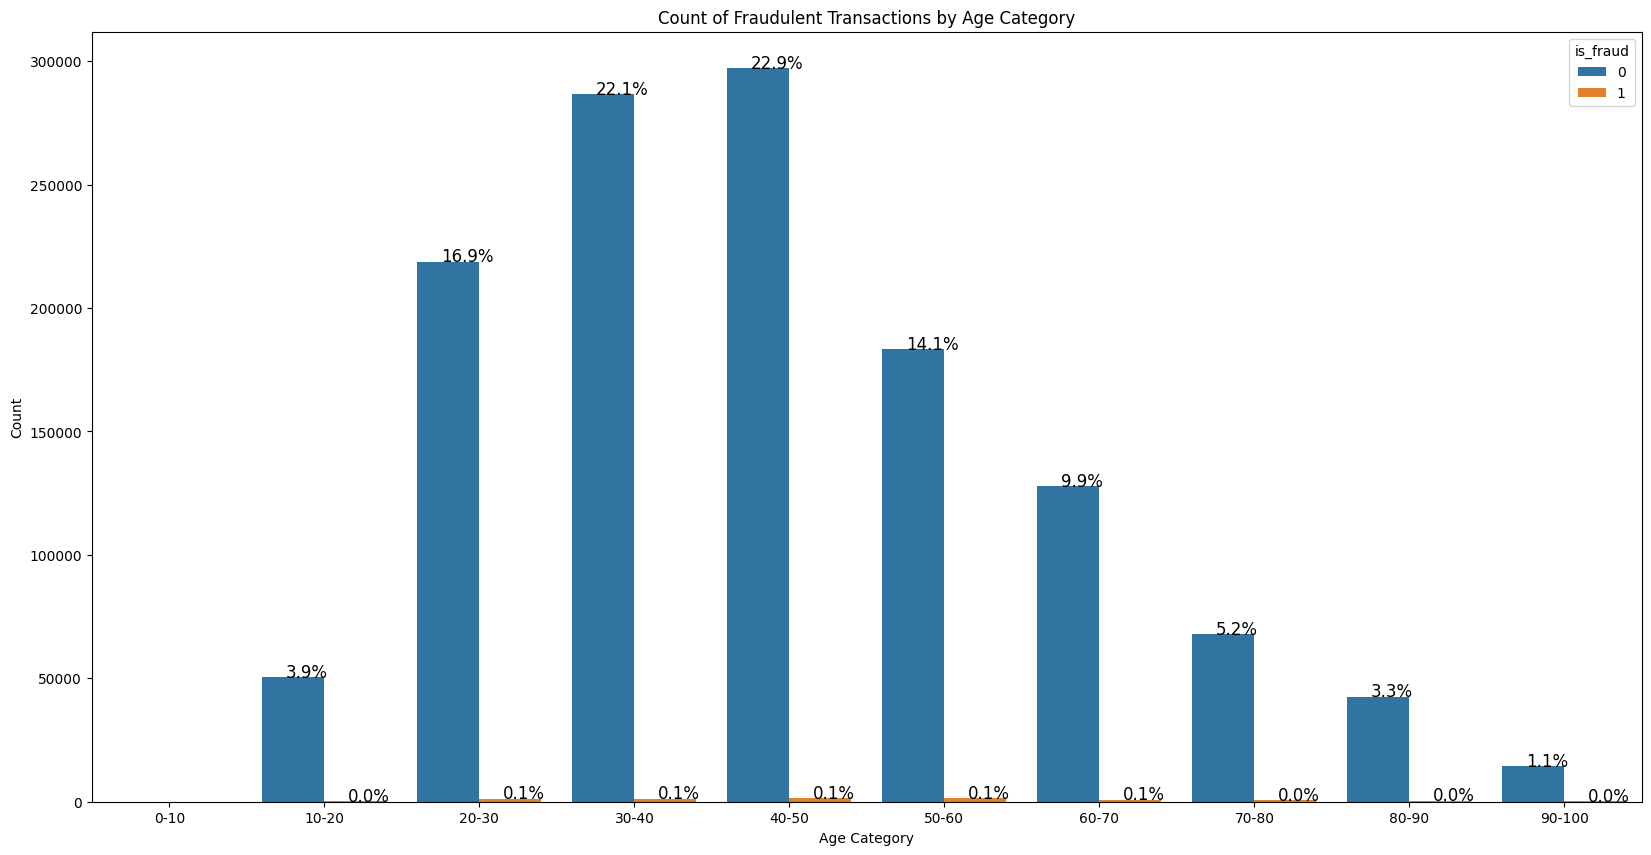

In [17]:
plt.figure(figsize=[20,10])
ax=sns.countplot(data=df_train1, x='Age_category', hue='is_fraud')
for p in ax.patches:
        total = len(df_train1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age Category')

# Show the plot
plt.show()

**People of age group between 40 to 50 years are the highest effected segment for fraudulent transactions, followed by 30-40 and so on**

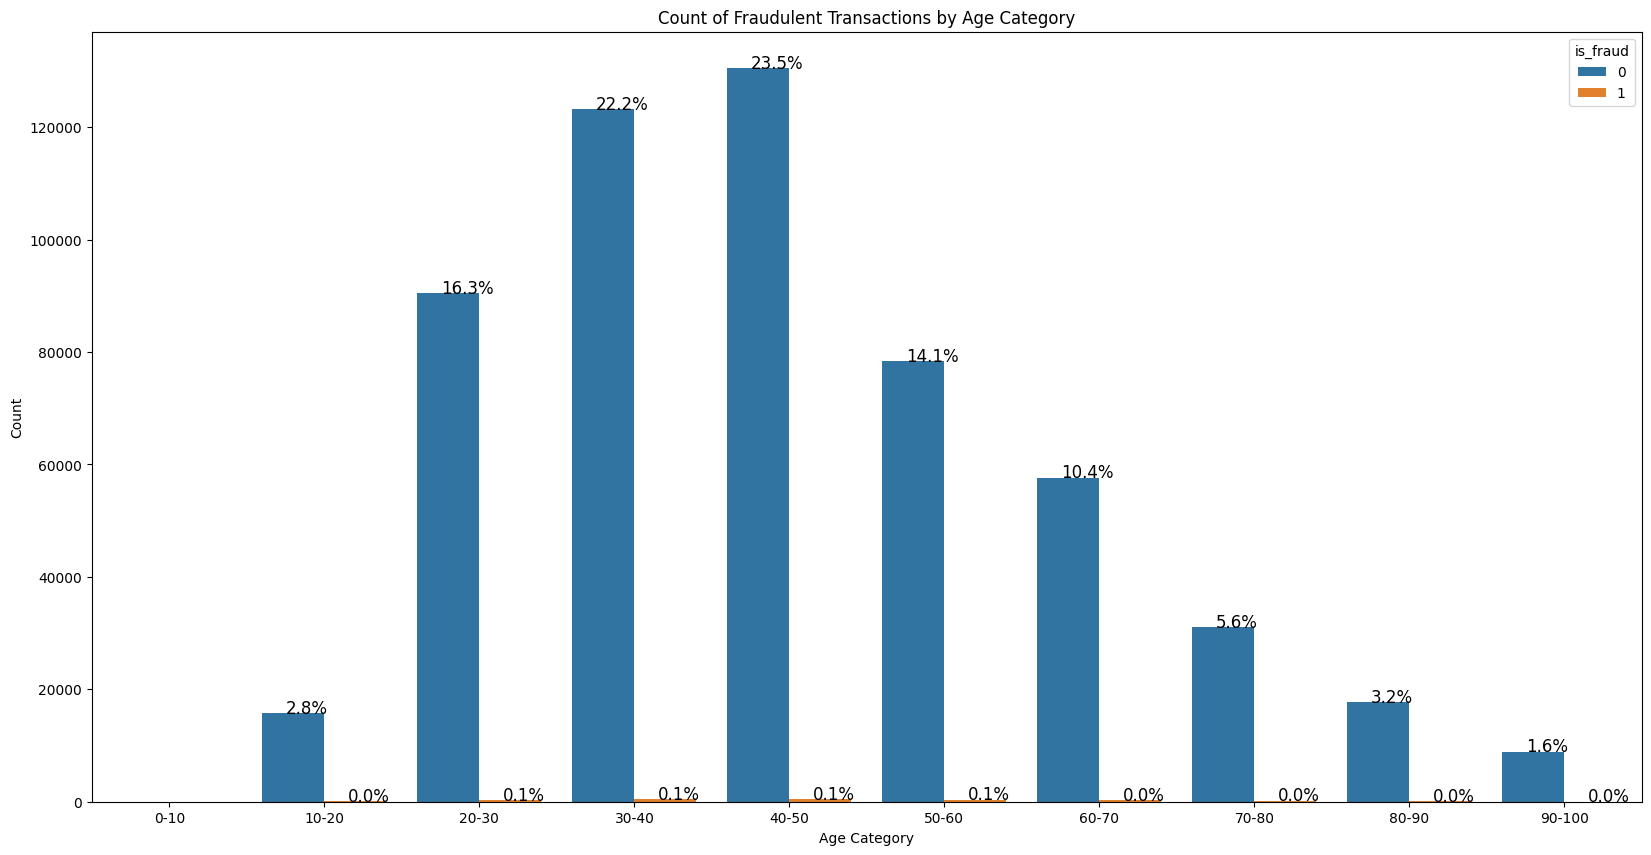

In [18]:
plt.figure(figsize=[20,10])
ax=sns.countplot(data=df_test1, x='Age_category', hue='is_fraud')
for p in ax.patches:
        total = len(df_test1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Count of Fraudulent Transactions by Age Category')

# Show the plot
plt.show()

**People of age group between 40 to 50 years are the highest effected segment for fraudulent transactions, followed by 30-40 and so on**

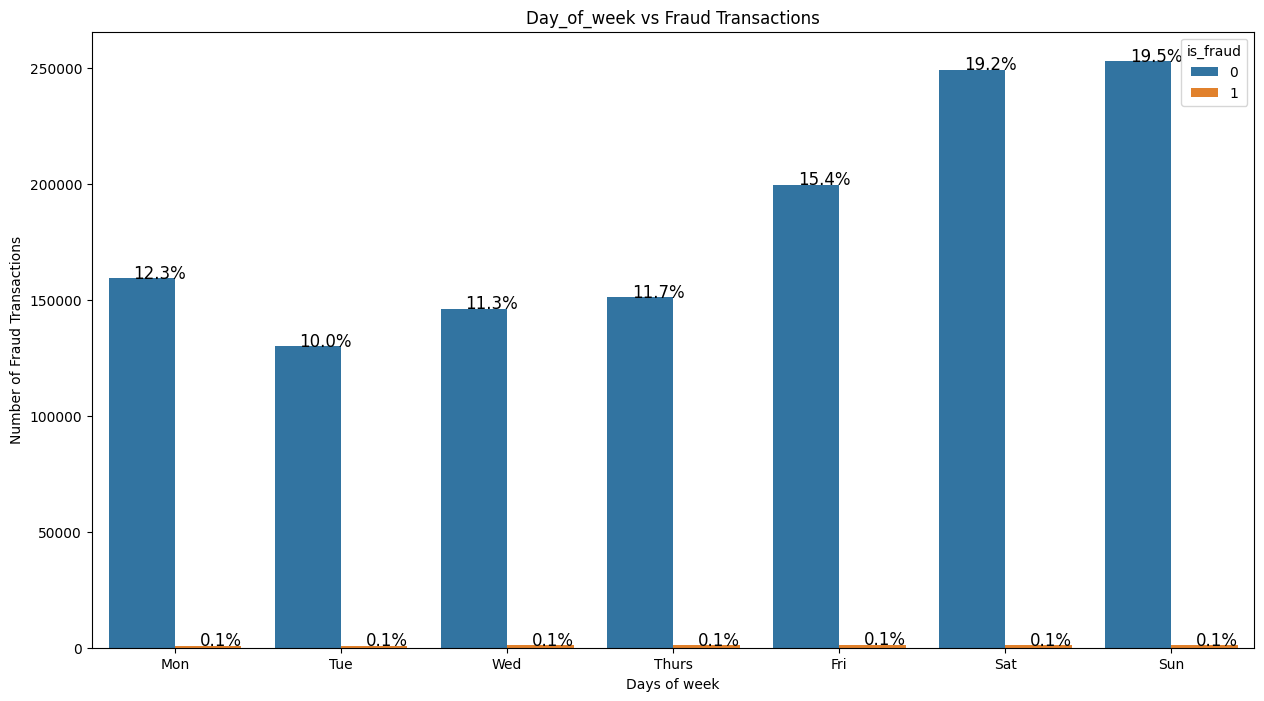

In [19]:
plt.figure(figsize=[15,8])

ax= sns.countplot(data=df_train1,x='day',hue='is_fraud')

for p in ax.patches:
        total = len(df_train1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

week = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
x_ticks = [0,1,2,3,4,5,6]
ax.set_title('Day_of_week vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Days of week')
ax.set_xticks(x_ticks)
ax.set_xticklabels(week)
plt.savefig('myplot1.png')
plt.show()

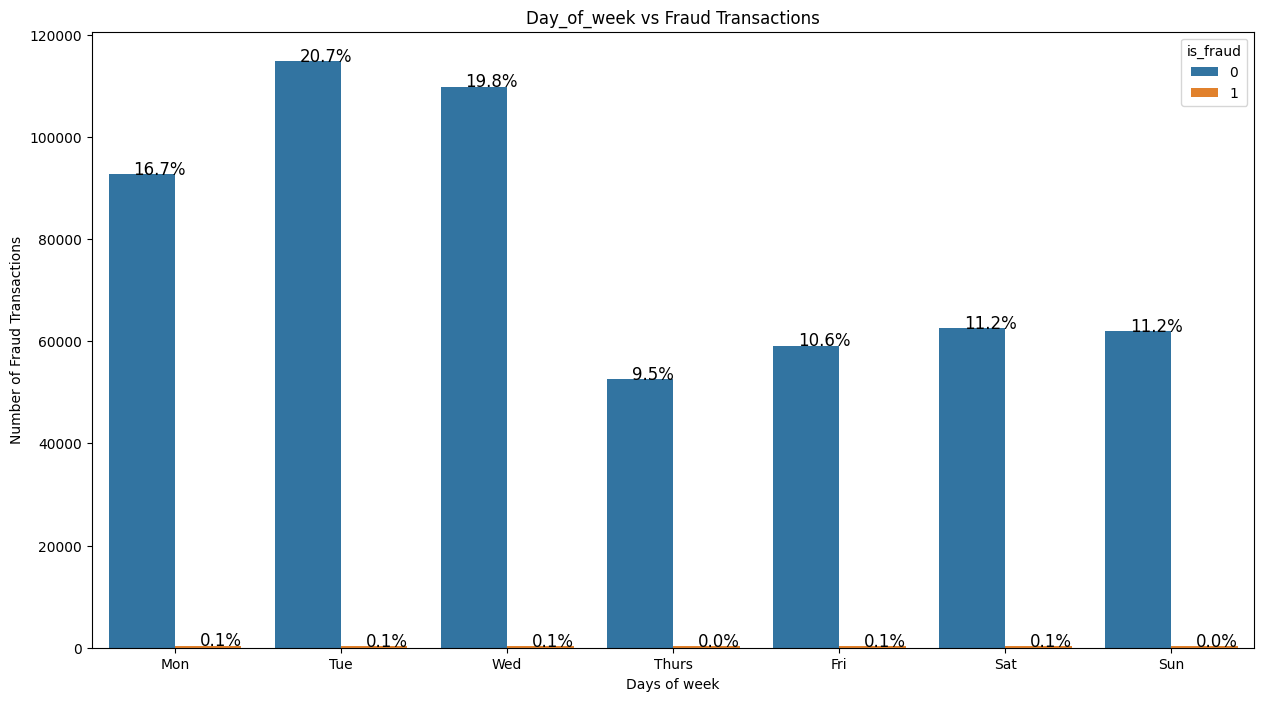

In [20]:
plt.figure(figsize=[15,8])

ax= sns.countplot(data=df_test1,x='day',hue='is_fraud')

for p in ax.patches:
        total = len(df_test1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

week = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']
x_ticks = [0,1,2,3,4,5,6]
ax.set_title('Day_of_week vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Days of week')
ax.set_xticks(x_ticks)
ax.set_xticklabels(week)
plt.savefig('myplot1.png')
plt.show()

more fraud transactions at tuesday and followed by wednesday

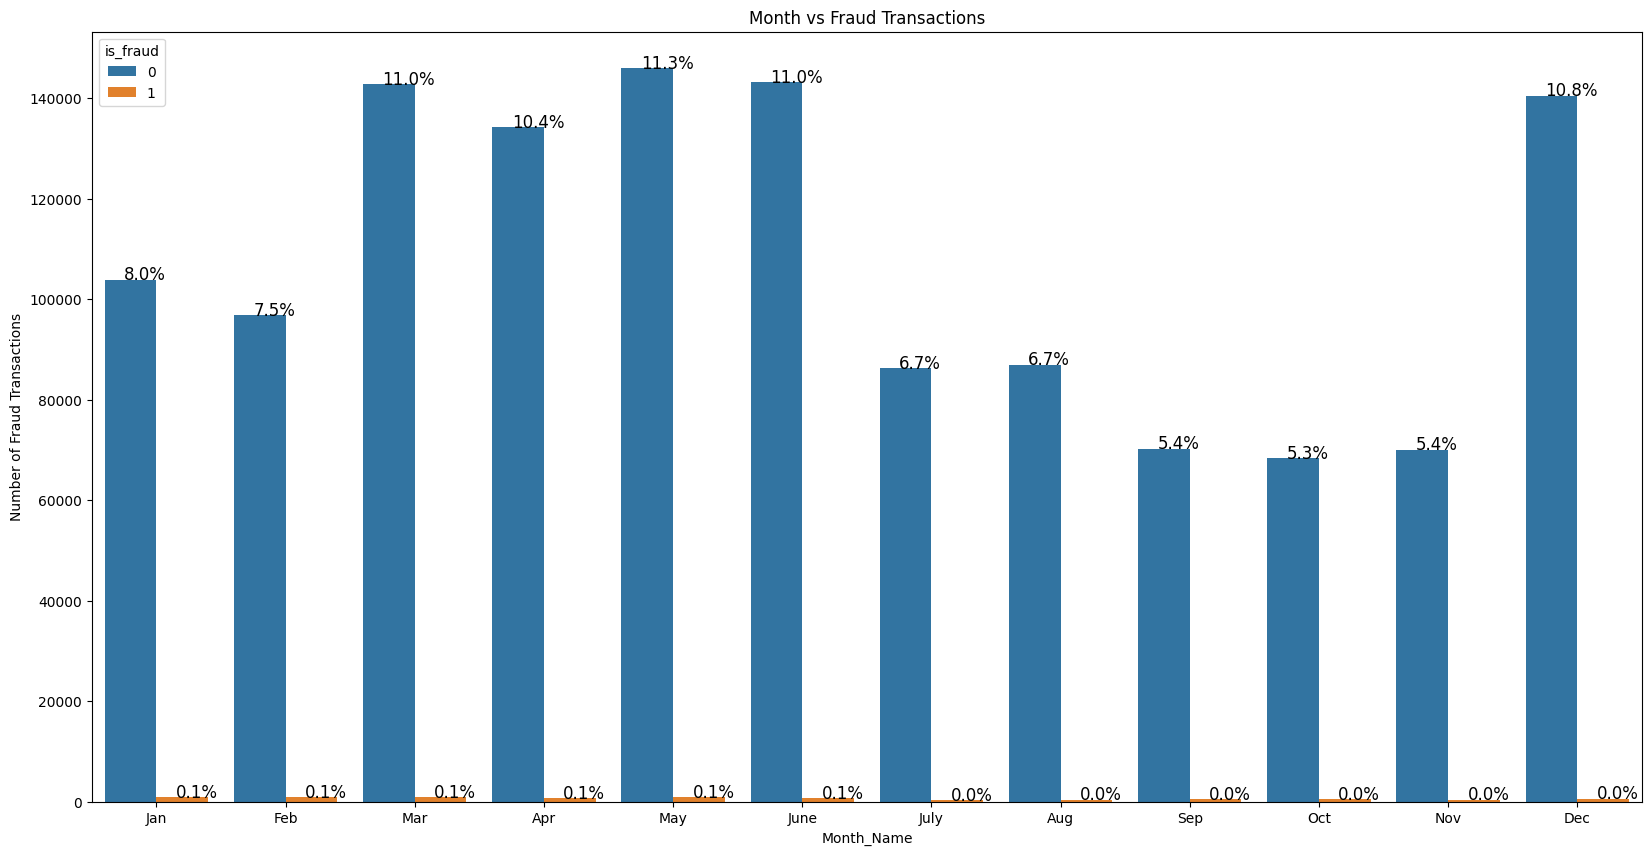

In [21]:
plt.figure(figsize=[20,10])

ax = sns.countplot(data=df_train1, x='month', hue='is_fraud')

for p in ax.patches:
        total = len(df_train1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
month_name = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

ax.set_title('Month vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Month_Name')

ax.set_xticks(x_ticks)
ax.set_xticklabels(month_name)

plt.savefig('myplot2.png')
plt.show()

**most fraud transaction happened at may**

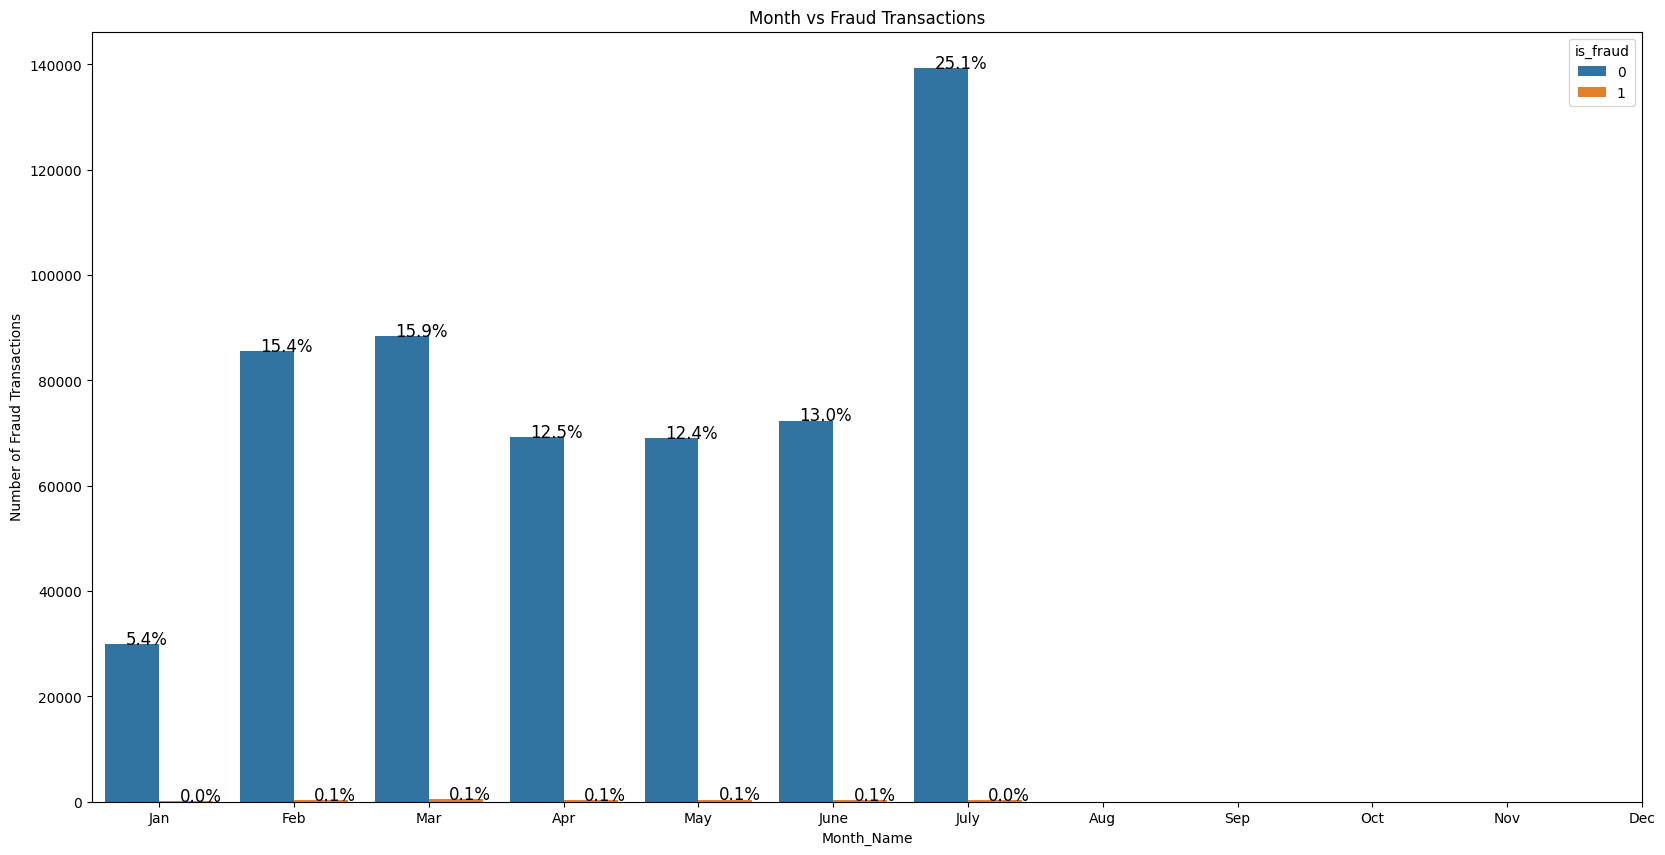

In [22]:
plt.figure(figsize=[20,10])

ax = sns.countplot(data=df_test1, x='month', hue='is_fraud')

for p in ax.patches:
        total = len(df_test1['is_fraud'])
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)


x_ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
month_name = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

ax.set_title('Month vs Fraud Transactions')
ax.set_ylabel('Number of Fraud Transactions')
ax.set_xlabel('Month_Name')

ax.set_xticks(x_ticks)
ax.set_xticklabels(month_name)

plt.savefig('myplot2.png')
plt.show()

**most fraud transaction happened at july and followed my march**

In [23]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [24]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   category               555719 non-null  object        
 2   amt                    555719 non-null  float64       
 3   gender                 555719 non-null  object        
 4   city                   555719 non-null  object        
 5   state                  555719 non-null  object        
 6   lat                    555719 non-null  float64       
 7   long                   555719 non-null  float64       
 8   city_pop               555719 non-null  int64         
 9   job                    555719 non-null  object        
 10  dob                    555719 non-null  datetime64[ns]
 11  merch_lat              555719 non-null  float64       
 12  merch_long             555719 non-null  floa

In [25]:
fraud_city = pd.DataFrame(df_train1.groupby('city')['is_fraud'].sum())
fraud_city = fraud_city[fraud_city['is_fraud']>0]
fraud_city.index

Index(['Achille', 'Acworth', 'Afton', 'Albany', 'Albuquerque', 'Alder',
       'Aledo', 'Alexandria', 'Allenhurst', 'Allentown',
       ...
       'Wilmington', 'Winfield', 'Winger', 'Winnsboro', 'Winslow', 'Winter',
       'Winthrop', 'Wittenberg', 'Yellowstone National Park', 'Zaleski'],
      dtype='object', name='city', length=702)

In [26]:
fraud_state = pd.DataFrame(df_train1.groupby('state')['is_fraud'].sum())
fraud_state = fraud_state[fraud_state['is_fraud']>0]
fraud_state.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [27]:
fraud_job = pd.DataFrame(df_train1.groupby('job')['is_fraud'].sum())
fraud_job = fraud_job[fraud_job['is_fraud']>0]
fraud_job.index

Index(['Academic librarian', 'Accountant, chartered',
       'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrator', 'Administrator, arts',
       'Administrator, charities/voluntary organisations',
       'Administrator, education',
       ...
       'Veterinary surgeon', 'Video editor', 'Volunteer coordinator',
       'Warden/ranger', 'Warehouse manager', 'Waste management officer',
       'Water quality scientist', 'Web designer', 'Wellsite geologist',
       'Writer'],
      dtype='object', name='job', length=443)

In [28]:
# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

df_train1['lat_dist'] = abs(round(df_train1['merch_lat']-df_train1['lat'],3))
df_train1['long_dist'] = abs(round(df_train1['merch_long']-df_train1['long'],3))

df_test1['lat_dist'] = abs(round(df_test1['merch_lat']-df_test1['lat'],3))
df_test1['long_dist'] = abs(round(df_test1['merch_long']-df_test1['long'],3))

df_train1[['merch_lat','lat','lat_dist','merch_long','long','long_dist']].head()

,merch_lat,lat,lat_dist,merch_long,long,long_dist
0,36.011293,36.0788,0.068,-82.048315,-81.1781,0.870
1,49.159047,48.8878,0.271,-118.186462,-118.2105,0.024
2,43.150704,42.1808,0.970,-112.154481,-112.2620,0.108
3,47.034331,46.2306,0.804,-112.561071,-112.1138,0.447
4,38.674999,38.4207,0.254,-78.632459,-79.4629,0.830


In [29]:
# Creating month column

df_train1['trans_month'] = pd.DatetimeIndex(df_train1['trans_date']).month
df_test1['trans_month'] = pd.DatetimeIndex(df_test1['trans_date']).month

df_train1[['trans_date_trans_time','trans_month']].head()

,trans_date_trans_time,trans_month
0,2019-01-01 00:00:18,1
1,2019-01-01 00:00:44,1
2,2019-01-01 00:00:51,1
3,2019-01-01 00:01:16,1
4,2019-01-01 00:03:06,1


In [30]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [31]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
month                         12
day                            7
hour                          24
Present_Age                   83
Age_category                   9
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [32]:
df_test1.nunique()

trans_date_trans_time    544760
category                     14
amt                       37256
gender                        2
city                        849
state                        50
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
merch_lat                546490
merch_long               551770
is_fraud                      2
trans_date                  194
age_at_trans                 82
month                         7
day                           7
hour                         24
Present_Age                  82
Age_category                  9
lat_dist                   1001
long_dist                  1001
trans_month                   7
dtype: int64

# Checking if there are any highly skewed categorical variableS

In [33]:
round(df_train1['category'].value_counts()/len(df_train1.index)*100,2)

gas_transport     10.15
grocery_pos        9.54
home               9.49
shopping_pos       9.00
kids_pets          8.72
shopping_net       7.52
entertainment      7.25
food_dining        7.05
personal_care      7.00
health_fitness     6.62
misc_pos           6.14
misc_net           4.88
grocery_net        3.51
travel             3.12
Name: category, dtype: float64

In [34]:
round(df_train1['gender'].value_counts()/len(df_train1.index)*100,2)

F    54.74
M    45.26
Name: gender, dtype: float64

In [35]:
def pie_bar_plot(col):
    print(df_train1[col].value_counts())
    sns.set_palette('viridis')
    fig,axs=plt.subplots(1,2)
    axs[0].pie(df_train1[col].value_counts().values.tolist(),autopct='%.2f%%',textprops={'fontsize':25},explode=[0,0.05],shadow=True)
    sns.countplot(data=df_train1,x=col,ax=axs[1])
    fig.legend(labels=df_train1[col].value_counts().index.tolist(),loc='upper left',fontsize=20)
    fig.tight_layout()
    fig.show()

F    709863
M    586812
Name: gender, dtype: int64


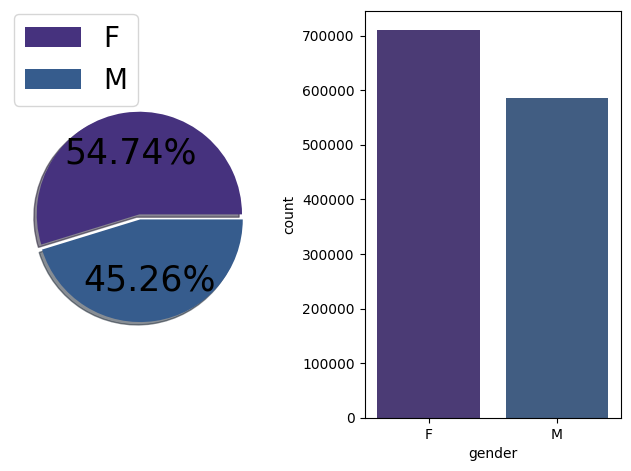

In [36]:
pie_bar_plot('gender')

In [37]:
round(df_train1['city'].value_counts()/len(df_train1.index)*100,2)

Birmingham                   0.43
San Antonio                  0.40
Utica                        0.39
Phoenix                      0.39
Meridian                     0.39
Thomas                       0.36
Conway                       0.36
Cleveland                    0.36
Warren                       0.35
Houston                      0.32
Burbank                      0.32
Naples                       0.32
Arcadia                      0.32
Indianapolis                 0.31
Brandon                      0.31
Fulton                       0.31
Lahoma                       0.28
Allentown                    0.28
Lakeland                     0.28
Dallas                       0.28
Washington                   0.28
Andrews                      0.28
Detroit                      0.28
Huntsville                   0.27
Hudson                       0.27
Orient                       0.27
Fort Washakie                0.27
Philadelphia                 0.27
Uledi                        0.24
Elberta       

In [38]:
round(df_train1['state'].value_counts()/len(df_train1.index)*100,2)

TX    7.32
NY    6.44
PA    6.16
CA    4.35
OH    3.58
MI    3.56
IL    3.34
FL    3.29
AL    3.16
MO    2.96
MN    2.45
AR    2.40
NC    2.33
WI    2.26
VA    2.26
SC    2.25
KY    2.20
IN    2.13
IA    2.08
OK    2.06
MD    2.02
GA    2.01
WV    1.98
NJ    1.90
NE    1.86
KS    1.77
MS    1.63
LA    1.62
WY    1.49
WA    1.46
OR    1.43
TN    1.35
ME    1.27
NM    1.27
ND    1.14
CO    1.07
MA    0.95
SD    0.95
VT    0.91
MT    0.91
AZ    0.83
UT    0.83
NH    0.64
CT    0.59
NV    0.43
ID    0.43
DC    0.28
HI    0.20
AK    0.16
RI    0.04
DE    0.00
Name: state, dtype: float64

In [39]:
round(df_train1['job'].value_counts()/len(df_train1.index)*100,2)


Film/video editor                                              0.75
Exhibition designer                                            0.71
Naval architect                                                0.67
Surveyor, land/geomatics                                       0.67
Materials engineer                                             0.64
Designer, ceramics/pottery                                     0.63
Systems developer                                              0.59
IT trainer                                                     0.59
Financial adviser                                              0.59
Environmental consultant                                       0.58
Chartered public finance accountant                            0.56
Scientist, audiological                                        0.55
Chief Executive Officer                                        0.55
Copywriter, advertising                                        0.55
Comptroller                                     

In [40]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

In [41]:
df_train1.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
city                         894
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
age_at_trans                  83
month                         12
day                            7
hour                          24
Present_Age                   83
Age_category                   9
lat_dist                    1001
long_dist                   1001
trans_month                   12
dtype: int64

In [42]:
 #Dropping variables not useful for model building

drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','Age_category','day']

df_train2 = df_train1.drop(drop_cols,axis=1)
df_test2 = df_test1.drop(drop_cols,axis=1)

df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,month,hour,Present_Age,lat_dist,long_dist,trans_month
0,misc_net,4.97,F,NC,3495,0,30.0,1,0,31.0,0.068,0.870,1
1,grocery_pos,107.23,F,WA,149,0,40.0,1,0,41.0,0.271,0.024,1
2,entertainment,220.11,M,ID,4154,0,56.0,1,0,57.0,0.970,0.108,1
3,gas_transport,45.00,M,MT,1939,0,51.0,1,0,52.0,0.804,0.447,1
4,misc_pos,41.96,M,VA,99,0,32.0,1,0,33.0,0.254,0.830,1


In [43]:
#Binary mapping on Gender

df_train2['gender'] = df_train2['gender'].map({'M': 1, 'F': 0})
df_test2['gender'] = df_test2['gender'].map({'M': 1, 'F': 0})

df_train2.head()

,category,amt,gender,state,city_pop,is_fraud,age_at_trans,month,hour,Present_Age,lat_dist,long_dist,trans_month
0,misc_net,4.97,0,NC,3495,0,30.0,1,0,31.0,0.068,0.870,1
1,grocery_pos,107.23,0,WA,149,0,40.0,1,0,41.0,0.271,0.024,1
2,entertainment,220.11,1,ID,4154,0,56.0,1,0,57.0,0.970,0.108,1
3,gas_transport,45.00,1,MT,1939,0,51.0,1,0,52.0,0.804,0.447,1
4,misc_pos,41.96,1,VA,99,0,32.0,1,0,33.0,0.254,0.830,1


In [44]:
df_train2[['amt','city_pop','age_at_trans','lat_dist','long_dist']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,amt,city_pop,age_at_trans,lat_dist,long_dist
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,8.882444e+04,4.549592e+01,5.002626e-01,5.003366e-01
std,1.603160e+02,3.019564e+05,1.739739e+01,2.885700e-01,2.888704e-01
min,1.000000e+00,2.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
25%,9.650000e+00,7.430000e+02,3.200000e+01,2.500000e-01,2.500000e-01
50%,4.752000e+01,2.456000e+03,4.300000e+01,5.010000e-01,5.000000e-01
75%,8.314000e+01,2.032800e+04,5.700000e+01,7.500000e-01,7.510000e-01
90%,1.366700e+02,1.861400e+05,7.000000e+01,9.000000e-01,9.000000e-01
95%,1.963100e+02,5.257130e+05,7.900000e+01,9.500000e-01,9.500000e-01
99%,5.459926e+02,1.577385e+06,9.100000e+01,9.900000e-01,9.900000e-01


In [45]:
# Creating dummy variables for Category

df_train3 = pd.get_dummies(df_train2,columns=['category'],drop_first=True)
df_test3 = pd.get_dummies(df_test2,columns=['category'],drop_first=True)

df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   state                    1296675 non-null  object 
 3   city_pop                 1296675 non-null  int64  
 4   is_fraud                 1296675 non-null  int64  
 5   age_at_trans             1296675 non-null  float64
 6   month                    1296675 non-null  int64  
 7   hour                     1296675 non-null  int64  
 8   Present_Age              1296675 non-null  float64
 9   lat_dist                 1296675 non-null  float64
 10  long_dist                1296675 non-null  float64
 11  trans_month              1296675 non-null  int64  
 12  category_food_dining     1296675 non-null  uint8  
 13  category_gas_transport   1296675 non-null 

# Building Model

In [46]:
# Dropping State

df_train4 = df_train3.drop('state',axis=1)
df_test4 = df_test3.drop('state',axis=1)
df_train4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age_at_trans             1296675 non-null  float64
 5   month                    1296675 non-null  int64  
 6   hour                     1296675 non-null  int64  
 7   Present_Age              1296675 non-null  float64
 8   lat_dist                 1296675 non-null  float64
 9   long_dist                1296675 non-null  float64
 10  trans_month              1296675 non-null  int64  
 11  category_food_dining     1296675 non-null  uint8  
 12  category_gas_transport   1296675 non-null  uint8  
 13  category_grocery_net     1296675 non-null 

In [47]:
# Splitting train and test dataset into X and y

X_train = df_train4.drop(['is_fraud'],axis=1)
y_train = df_train4['is_fraud']

X_test = df_test4.drop(['is_fraud'],axis=1)
y_test = df_test4['is_fraud']

# Oversampling data to compensate for the high class imbalance in the data

In [48]:
# Using ADASYN to oversample
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
X_train_res, y_train_res = ADASYN().fit_resample(X_train, y_train)

from collections import Counter
print(sorted(Counter(y_train_res).items()))

[(0, 1289169), (1, 1288598)]


# Building a Random Forest Model

In [49]:
 #Importing required library
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV


In [50]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=12, min_samples_leaf=100, random_state=100, oob_score=True)

In [51]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=5, max_features=12, min_samples_leaf=100,
                       n_estimators=10, oob_score=True, random_state=100)

In [52]:
rf.oob_score_

0.871351056941919

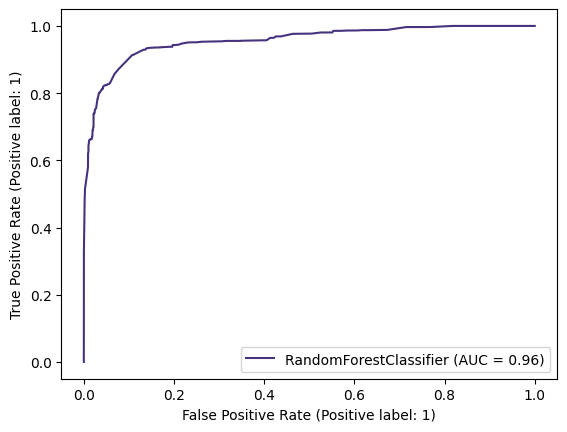

In [53]:
RocCurveDisplay.from_estimator(rf, X_train_res, y_train_res)
plt.show()

In [54]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [55]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,amt,0.806787
5,hour,0.081720
15,category_home,0.019715
13,category_grocery_pos,0.016054
16,category_kids_pets,0.012442
1,gender,0.011241
22,category_travel,0.010141
18,category_misc_pos,0.008484
11,category_gas_transport,0.006077
20,category_shopping_net,0.005243


In [56]:
y_train_pred = rf.predict(X_train_res)
y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89   1289169
           1       0.95      0.81      0.88   1288598

    accuracy                           0.89   2577767
   macro avg       0.89      0.89      0.88   2577767
weighted avg       0.89      0.89      0.88   2577767



# Predicting on test set

In [58]:
y_test_pred = rf.predict(X_test)
y_test_pred[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.90      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.93      0.56    555719
weighted avg       1.00      0.96      0.98    555719



# Testing model on original data without oversampling

In [60]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1289169
           1       0.12      0.90      0.21      7506

    accuracy                           0.96   1296675
   macro avg       0.56      0.93      0.59   1296675
weighted avg       0.99      0.96      0.97   1296675

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.90      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.93      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [61]:
df_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
trans_date                   537
dtype: int64

In [62]:
df_train.shape

(1296675, 23)

In [63]:
# Subset of df_train

df_train_merge = df_train[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_train_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0


In [64]:
# Creating dataframe of y_train_pred

df_train_pred = pd.DataFrame(y_train_pred)
df_train_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [65]:
# Merging the two dataframes

df_train_final = pd.concat([df_train_merge, df_train_pred],axis=1)
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [66]:
# Renaming column

df_train_final= df_train_final.rename(columns={ 0 : 'is_fraud_pred'})
df_train_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [67]:
df_train_final.groupby('is_fraud')['is_fraud'].count()

is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64

In [68]:
df_train_final.groupby('is_fraud_pred')['is_fraud_pred'].count()

is_fraud_pred
0    1238093
1      58582
Name: is_fraud_pred, dtype: int64

In [69]:
# Subset of df_test

df_test_merge = df_test[['trans_date_trans_time','amt','trans_num','is_fraud']]
df_test_merge.head()

,trans_date_trans_time,amt,trans_num,is_fraud
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0


In [70]:
# Creating dataframe of y_test_pred

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [71]:
 # Merging the two dataframes

df_test_final = pd.concat([df_test_merge, df_test_pred],axis=1)
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,0
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


In [72]:
# Renaming column

df_test_final= df_test_final.rename(columns={ 0 : 'is_fraud_pred'})
df_test_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2020-06-21 12:14:25,2.86,2da90c7d74bd46a0caf3777415b3ebd3,0,0
1,2020-06-21 12:14:33,29.84,324cc204407e99f51b0d6ca0055005e7,0,0
2,2020-06-21 12:14:53,41.28,c81755dbbbea9d5c77f094348a7579be,0,0
3,2020-06-21 12:15:15,60.05,2159175b9efe66dc301f149d3d5abf8c,0,0
4,2020-06-21 12:15:17,3.19,57ff021bd3f328f8738bb535c302a31b,0,0


<Axes: ylabel='is_fraud'>

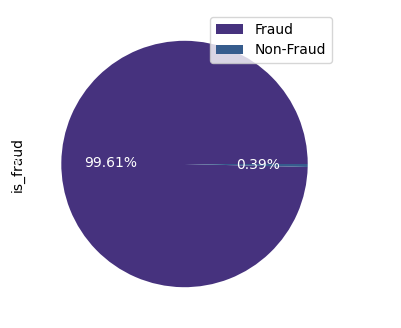

In [73]:
df_test_final.groupby('is_fraud')['is_fraud'].count().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

<Axes: ylabel='is_fraud_pred'>

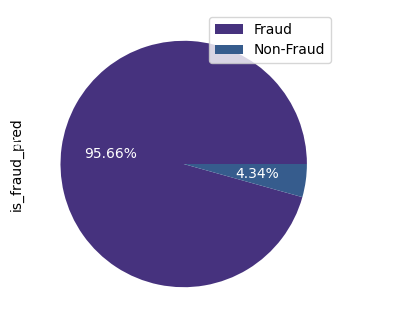

In [74]:
df_test_final.groupby('is_fraud_pred')['is_fraud_pred'].count().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

In [75]:
# Merging train and test dataset for cost benefit analysis

df_merge_final = pd.concat([df_train_final, df_test_final],axis=0)
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0


In [76]:
df_merge_final.shape

(1852394, 5)

In [ ]:
#Importing required library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE, ADASYN

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace this with your actual data loading and preprocessing



# Define the models
models = {
    'Logistic Regression - Imbalanced': LogisticRegression(),
    'Logistic Regression - SMOTE': LogisticRegression(),
    'Logistic Regression - ADASYN': LogisticRegression(),
    'Decision Trees - Imbalanced': DecisionTreeClassifier(),
    'Decision Trees - SMOTE': DecisionTreeClassifier(),
    'Decision Trees- ADASYN': DecisionTreeClassifier(),
    'Random Forest - Imbalanced': RandomForestClassifier(),
    'Random Forest - SMOTE': RandomForestClassifier(),
    'Random Forest- ADASYN': RandomForestClassifier(),
}

# Apply oversampling techniques and train models
for model_name, model in models.items():
    if 'SMOTE' in model_name:
        X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
    elif 'ADASYN' in model_name:
        X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    model.fit(X_resampled, y_resampled)

# Evaluate and store the scores
scores = {'Model Name': [], 'Train_Recall': [], 'Test_Recall': [], 'AUC__Score': []}

for model_name, model in models.items():
    # Training set scores
    y_train_pred = model.predict(X_resampled)
    train_recall = recall_score(y_resampled, y_train_pred)

    # Testing set scores
    y_test_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred)

    # AUC Score
    y_test_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Store scores in the dictionary
    scores['Model Name'].append(model_name)
    scores['Train_Recall'].append(train_recall)
    scores['Test_Recall'].append(test_recall)
    scores['AUC__Score'].append(auc_score)

# Create DataFrame from the dictionary
Model_summary = pd.DataFrame(scores)

# Display the summary
print(Model_summary)

                         Model Name  Train_Recall  Test_Recall  AUC__Score
0  Logistic Regression - Imbalanced      0.000718     0.000466    0.596539
1       Logistic Regression - SMOTE      0.663182     0.715152    0.839721
2      Logistic Regression - ADASYN      0.685271     0.757110    0.837471
3       Decision Trees - Imbalanced      0.588136     0.793007    0.895945
4            Decision Trees - SMOTE      0.996140     0.789277    0.891159
5            Decision Trees- ADASYN      0.997730     0.785082    0.889019
6        Random Forest - Imbalanced      0.522535     0.738462    0.979975
7             Random Forest - SMOTE      0.999673     0.809324    0.986417
8             Random Forest- ADASYN      1.000000     0.810256    0.986446


If you prioritize recall and generalization to new data, Logistic Regression with SMOTE or ADASYN might be a good choice.
If you want even higher recall and are comfortable with the complexity of decision trees, Decision Trees or Random Forest might be suitable.

# Cost Benefit Analysis

In [77]:
# Creating month and year columns

df_merge_final['month'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).month
df_merge_final['year'] = pd.DatetimeIndex(df_merge_final['trans_date_trans_time']).year
df_merge_final.head()

,trans_date_trans_time,amt,trans_num,is_fraud,is_fraud_pred,month,year
0,2019-01-01 00:00:18,4.97,0b242abb623afc578575680df30655b9,0,0,1,2019
1,2019-01-01 00:00:44,107.23,1f76529f8574734946361c461b024d99,0,0,1,2019
2,2019-01-01 00:00:51,220.11,a1a22d70485983eac12b5b88dad1cf95,0,0,1,2019
3,2019-01-01 00:01:16,45.00,6b849c168bdad6f867558c3793159a81,0,0,1,2019
4,2019-01-01 00:03:06,41.96,a41d7549acf90789359a9aa5346dcb46,0,0,1,2019


In [78]:
# Group by variable creation

g = df_merge_final.groupby(["year","month"])

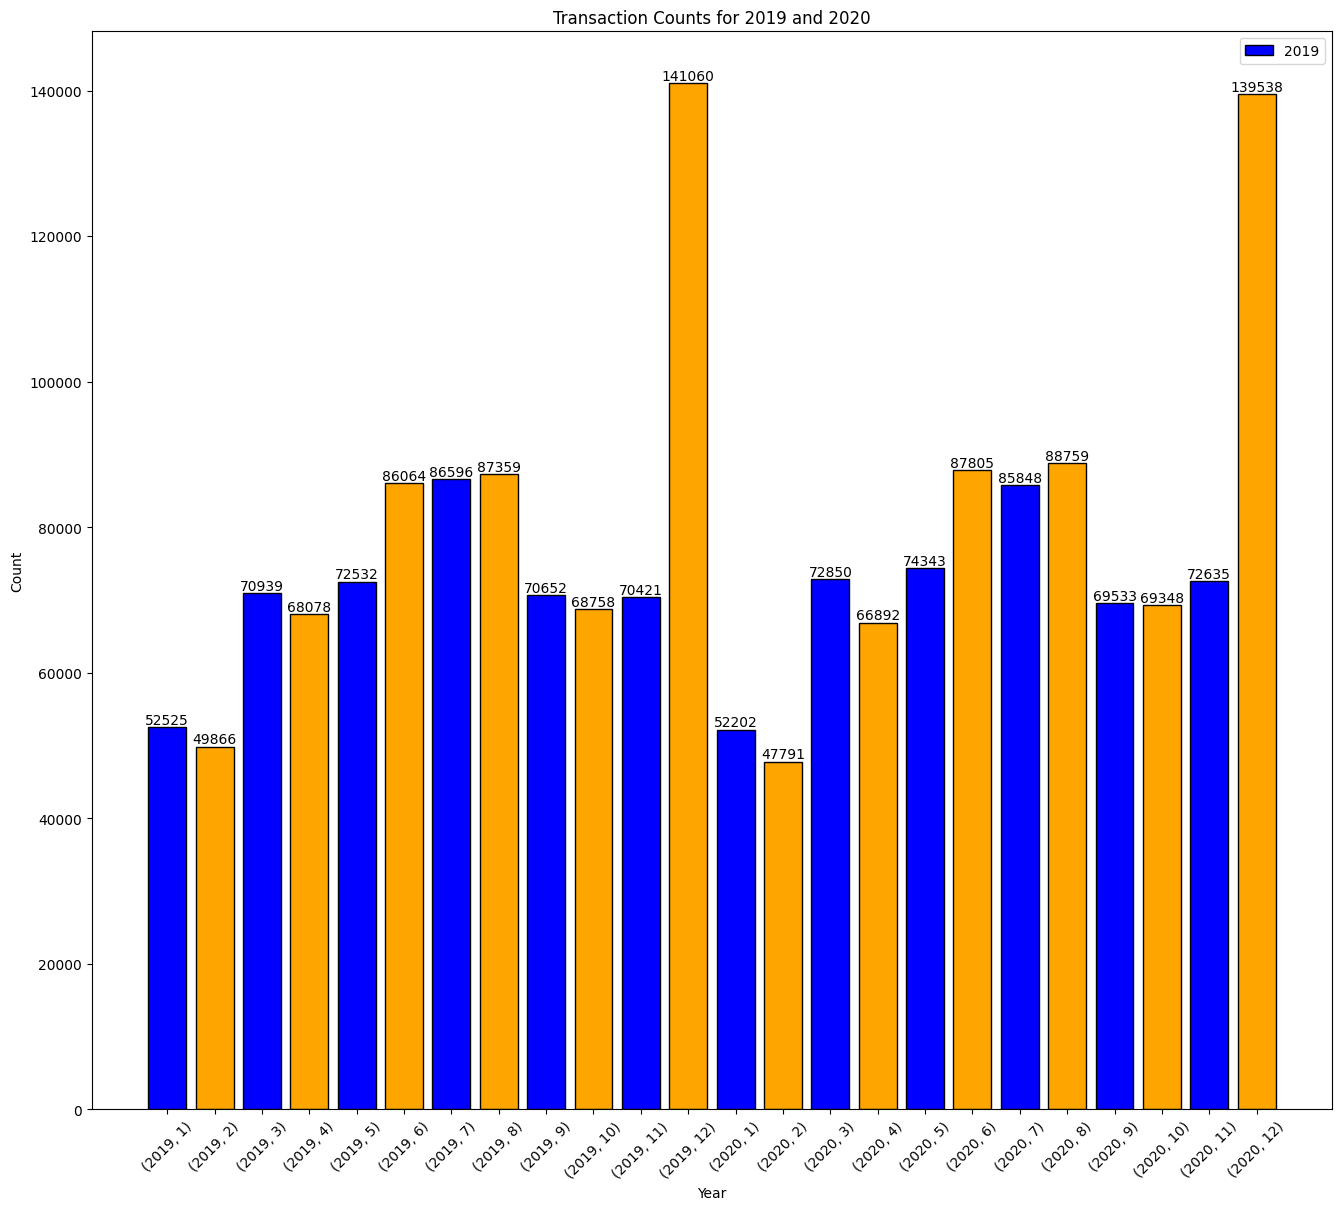

In [79]:
# Number of transactions per month

data = g.trans_num.count()

# Convert index to numeric values
x_values = range(len(data))

fig, ax = plt.subplots(figsize=(16, 14))
bars = ax.bar(x_values, data, color=['blue', 'orange'], edgecolor='black')

# Adding labels and legend
plt.title('Transaction Counts for 2019 and 2020')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(x_values, data.index, rotation=45)
plt.legend(['2019', '2020'])

# Adding text annotations on each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{round(yval, 2)}', ha='center', va='bottom', color='black')

plt.show()

In [80]:
# Average number of transactions per month

df_merge_final.trans_num.count()/24

77183.08333333333

In [81]:
# Average Number of fraudulent transactions per month

df_merge_final[df_merge_final['is_fraud']==1].trans_num.count()/24

402.125

In [82]:
# Average amount per fraud transaction

df_merge_final[df_merge_final['is_fraud']==1].amt.mean()

530.661412288882

In [83]:
# Average number of transactions per month detected as fraud by the model

df_merge_final[df_merge_final['is_fraud_pred']==1].trans_num.count()/24

3444.9583333333335

In [84]:
# Average number of transactions per month that are fraudulent but are not detected by the model

Undetected_frauds = df_merge_final.loc[(df_merge_final.is_fraud_pred==0) & (df_merge_final.is_fraud==1)]
Undetected_frauds.trans_num.count()/24

38.708333333333336

In [85]:
average_amount_per_fraud = df_merge_final[df_merge_final['is_fraud'] == 1]['amt'].mean()
print("Average Amount per Fraud Transaction:", average_amount_per_fraud)
undetected_frauds = df_merge_final.loc[(df_merge_final['is_fraud_pred'] == 0) & (df_merge_final['is_fraud'] == 1)]
average_undetected_fraud_per_month = undetected_frauds.groupby('month')['trans_num'].count().mean()
print("Average Number of Transactions per Month that are Fraudulent but Not Detected by the Model:", average_undetected_fraud_per_month)
result = average_amount_per_fraud * average_undetected_fraud_per_month
print("Result:", result)

Average Amount per Fraud Transaction: 530.661412288882
Average Number of Transactions per Month that are Fraudulent but Not Detected by the Model: 77.41666666666667
Result: 41082.03766803096


In [86]:
average_detected_fraud_per_month = df_merge_final[df_merge_final['is_fraud_pred'] == 1]['trans_num'].count() / 24
print("Average Number of Transactions per Month Detected as Fraud by the Model:", average_detected_fraud_per_month)
cost_per_detected_fraud_transaction = 1.5
total_cost_customer_support = average_detected_fraud_per_month * cost_per_detected_fraud_transaction
print("Total Cost of Providing Customer Support per Month for Detected Fraudulent Transactions:", total_cost_customer_support)


Average Number of Transactions per Month Detected as Fraud by the Model: 3444.9583333333335
Total Cost of Providing Customer Support per Month for Detected Fraudulent Transactions: 5167.4375


In [88]:
# Calculate the average number of transactions per month that are fraudulent but not detected by the model
undetected_frauds = df_merge_final.loc[(df_merge_final['is_fraud_pred'] == 0) & (df_merge_final['is_fraud'] == 1)]
average_undetected_fraud_per_month = undetected_frauds['trans_num'].count() / 24

# Calculate the average amount per fraud transaction
average_amount_per_fraud = df_merge_final[df_merge_final['is_fraud'] == 1]['amt'].mean()

# Calculate the total amount per month for fraudulent transactions not detected by the model
total_amount_undetected_fraud_per_month = average_undetected_fraud_per_month * average_amount_per_fraud

print("Cost incurred due to these fraudulent transactions left undetected by the model:", total_amount_undetected_fraud_per_month)


Cost incurred due to these fraudulent transactions left undetected by the model: 20541.01883401548


In [89]:
# Calculate the average number of fraudulent transactions per month
average_fraudulent_transactions_per_month = df_merge_final[df_merge_final['is_fraud'] == 1]['trans_num'].count() / 24

# Calculate the average amount per fraud transaction
average_amount_per_fraud_transaction = df_merge_final[df_merge_final['is_fraud'] == 1]['amt'].mean()

# Calculate the cost incurred per month before the model was deployed
cost_incurred_before_model = average_fraudulent_transactions_per_month * average_amount_per_fraud_transaction

print("Cost Incurred per Month Before the Model was Deployed:", cost_incurred_before_model)


Cost Incurred per Month Before the Model was Deployed: 213392.2204166667


In [91]:
total_cost_after_model_deployed = total_cost_customer_support + (average_amount_per_fraud * average_undetected_fraud_per_month)
print("Total Cost Incurred per Month After the Model is Built and Deployed:", total_cost_after_model_deployed)

Total Cost Incurred per Month After the Model is Built and Deployed: 25708.45633401548


In [92]:
Final_Savings=cost_incurred_before_model-total_cost_after_model_deployed
print("Final Savings After Deploying the model = $",Final_Savings)

Final Savings After Deploying the model = $ 187683.76408265124
